In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math

In [22]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [23]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [26]:
# 작업 위치 고정
f_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(f_path)
except:
    pass

In [27]:
code_path = os.getcwd().replace('\\','/')
code_path

'c:/data/Wantreez/Crawling/music'

In [28]:
folder = 'crawled_data/2022년1-3월'
path = os.path.join(code_path, folder)
path

'c:/data/Wantreez/Crawling/music\\crawled_data/2022년1-3월'

In [8]:
folder_list = ['week_bugs', 'week_genie', 'week_mlelon']
folder_list

['week_bugs', 'week_genie', 'week_mlelon']

In [10]:
one_folder = folder_list[0]
one_folder_path = os.path.join(path, one_folder)
file_list = os.listdir( one_folder_path )
file_list

['week_bugs_20211227.xlsx',
 'week_bugs_20220103.xlsx',
 'week_bugs_20220110.xlsx',
 'week_bugs_20220117.xlsx',
 'week_bugs_20220124.xlsx',
 'week_bugs_20220131.xlsx',
 'week_bugs_20220207.xlsx',
 'week_bugs_20220214.xlsx',
 'week_bugs_20220221.xlsx',
 'week_bugs_20220228.xlsx',
 'week_bugs_20220307.xlsx',
 'week_bugs_20220314.xlsx',
 'week_bugs_20220321.xlsx',
 'week_bugs_20220328.xlsx']

In [11]:
total_df = pd.DataFrame()
for one_file in file_list:
    temp_path = os.path.join(one_folder_path, one_file)
    temp = pd.read_excel(temp_path)
    total_df = pd.concat([total_df, temp], ignore_index=True)

In [12]:
total_df.head()

날짜  순위                 곡         가수                             앨범
0  2021-12-27   1               겨울잠    아이유(IU)                            조각집
1  2021-12-27   2               드라마    아이유(IU)                            조각집
2  2021-12-27   3  Dreams Come True      aespa  Dreams Come True - SM STATION
3  2021-12-27   4               정거장    아이유(IU)                            조각집
4  2021-12-27   5            ELEVEN  IVE (아이브)                         ELEVEN

In [13]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1400 non-null   object
 1   순위      1400 non-null   int64 
 2   곡       1400 non-null   object
 3   가수      1400 non-null   object
 4   앨범      1400 non-null   object
dtypes: int64(1), object(4)
memory usage: 54.8+ KB


In [16]:
uni_df = total_df.drop_duplicates(['곡', '가수']).reset_index(drop=True)
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      307 non-null    object
 1   순위      307 non-null    int64 
 2   곡       307 non-null    object
 3   가수      307 non-null    object
 4   앨범      307 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.1+ KB


In [ ]:
number = 20
for i in range( math.ceil(uni_df.shape[0] / number) ):
    gragh_uni_df = uni_df.iloc[i*number:(i+1)*number].reset_index(drop=True)
    plt.figure(figsize=(12, 8))
    ax = plt.axes()
    ax.invert_yaxis()
    for j in range(gragh_uni_df.shape[0]):
        title = uni_df['곡'][j]
        artist = uni_df['가수'][j]
        temp = total_df[ (total_df['곡'] == title) & (total_df['가수'] == artist)].reset_index(drop=True)
        labels = f'{title}-{artist}'
        plt.plot(temp['날짜'], temp['순위'], label=labels)
        plt.title(f'{i*number} ~ {(i+1)*number}번째 곡')
        plt.legend()

In [37]:
code_path

'c:/data/Wantreez/Crawling/music'

In [36]:
path

'c:/data/Wantreez/Crawling/music\\crawled_data/2022년1-3월'

[week_bugs]1_3month_mean_outliers.xlsx 출력


C:\Users\kbjung\AppData\Local\Temp/ipykernel_2140/3906591531.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(15, 8) )


[week_genie]1_3month_mean_outliers.xlsx 출력
[week_melon]1_3month_mean_outliers.xlsx 출력


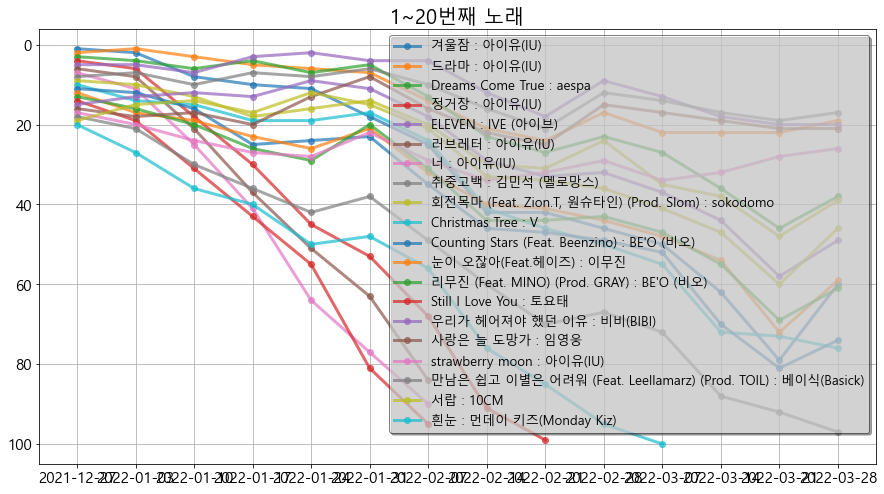

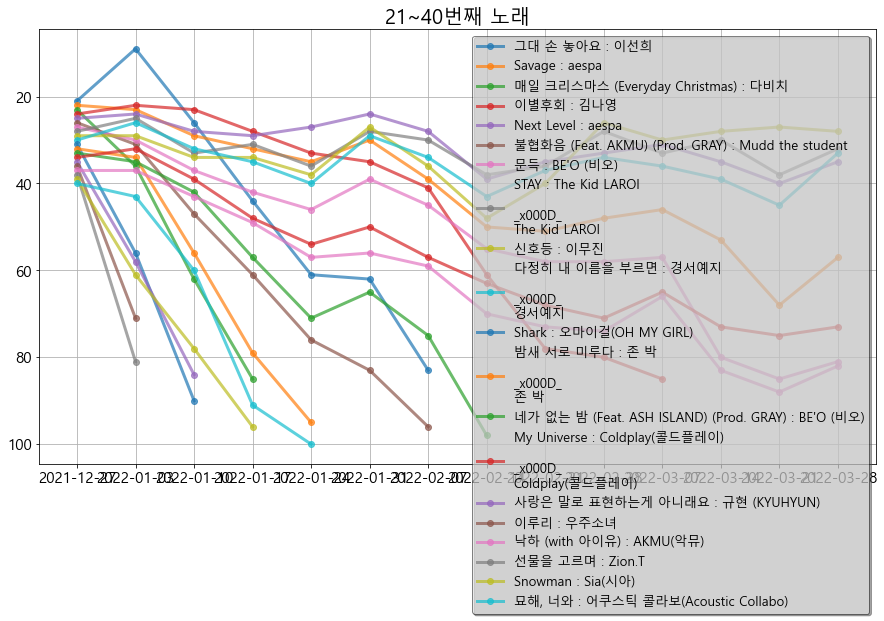

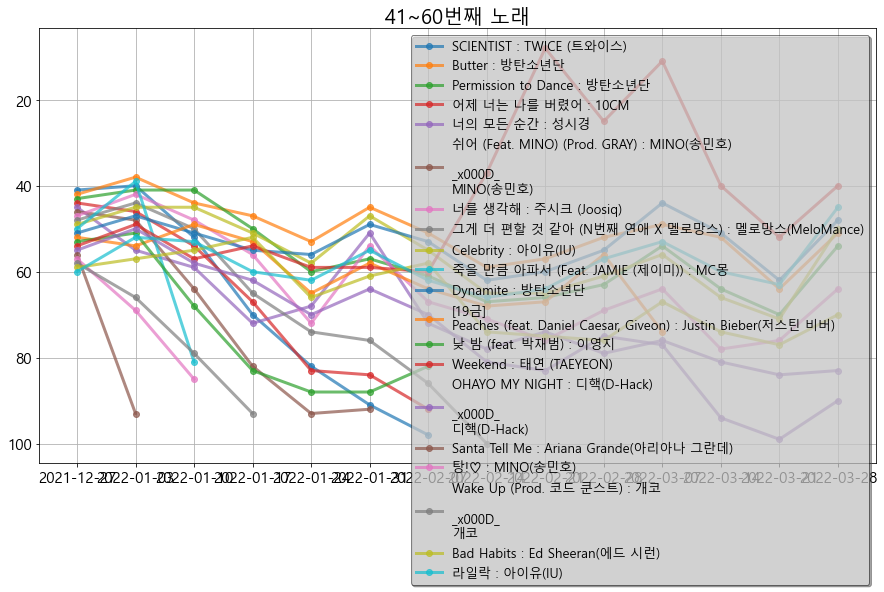

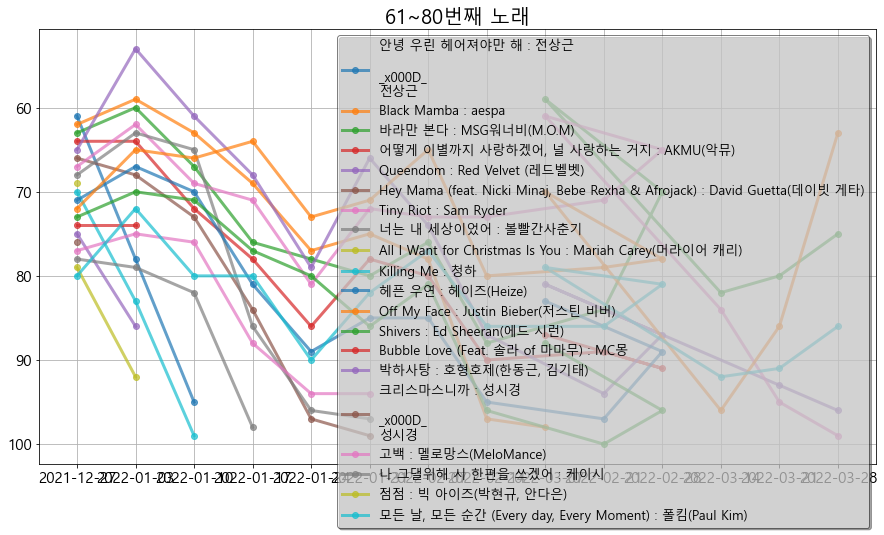

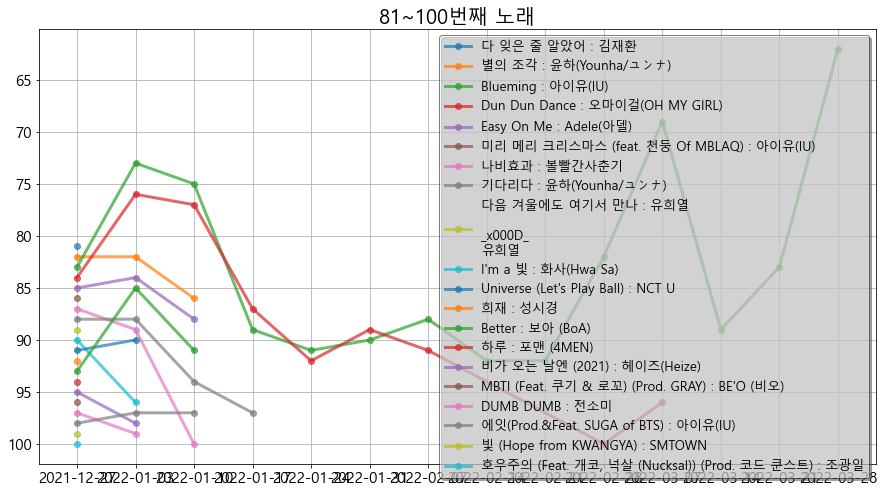

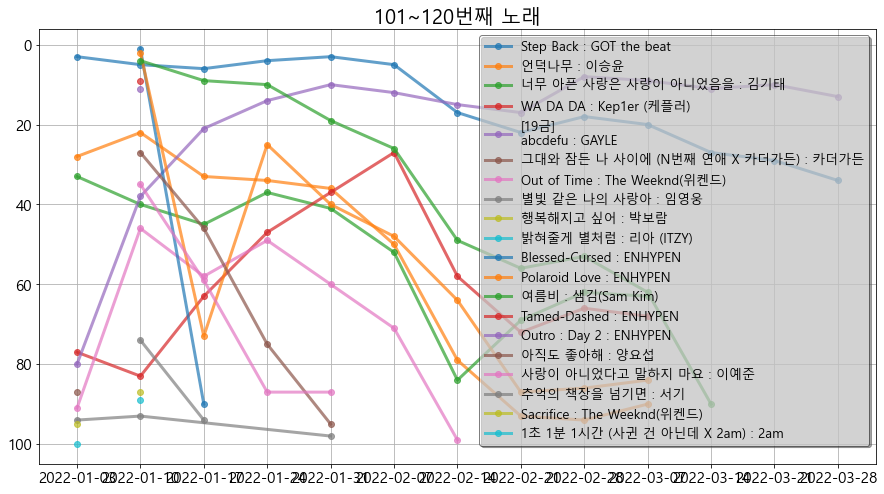

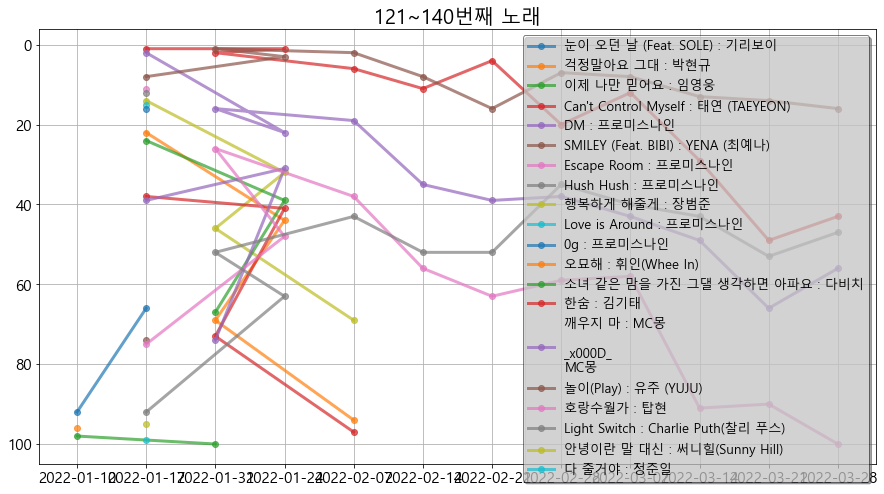

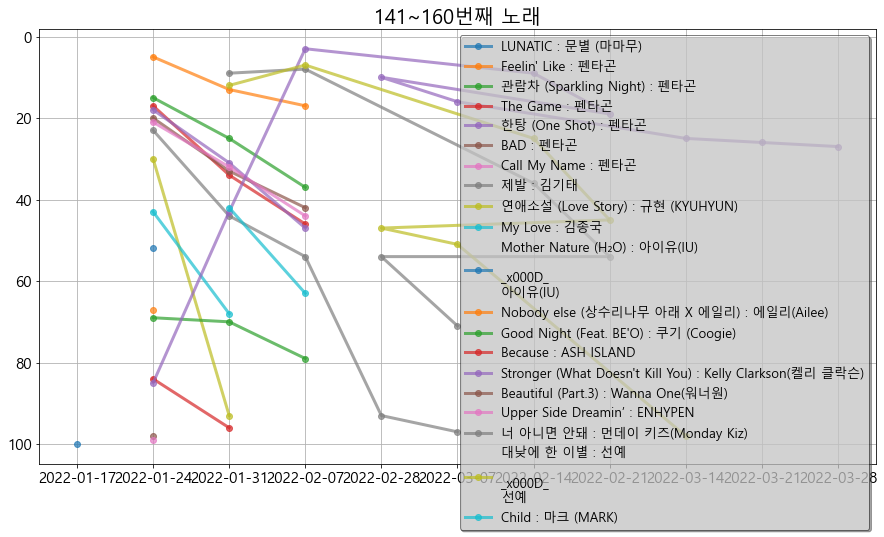

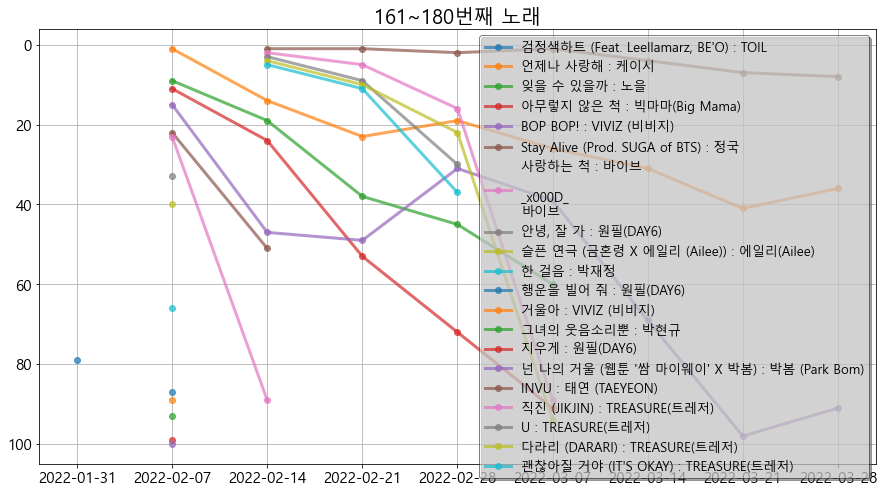

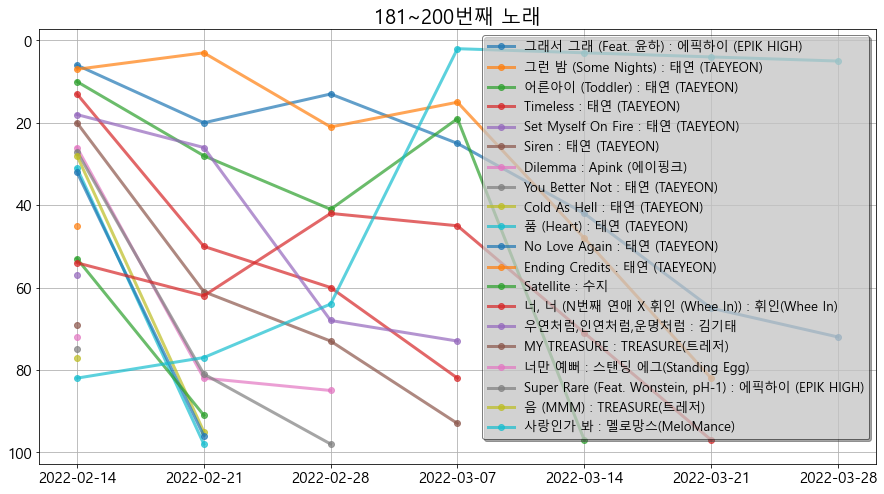

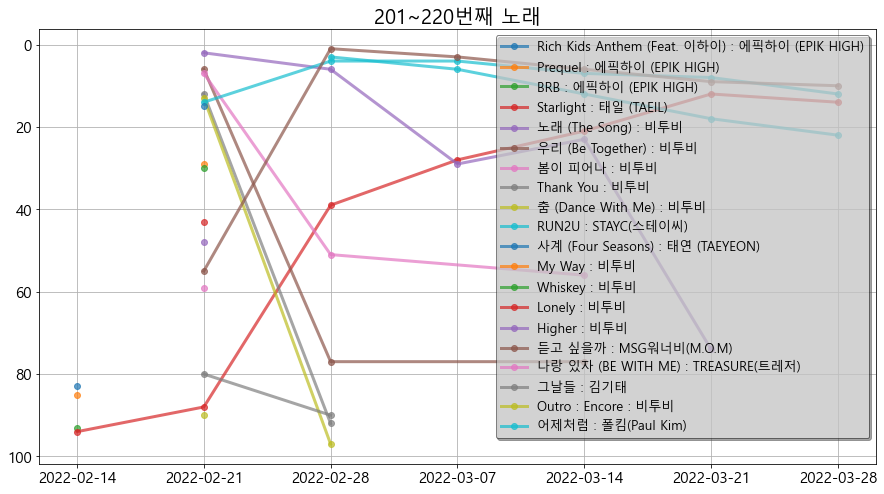

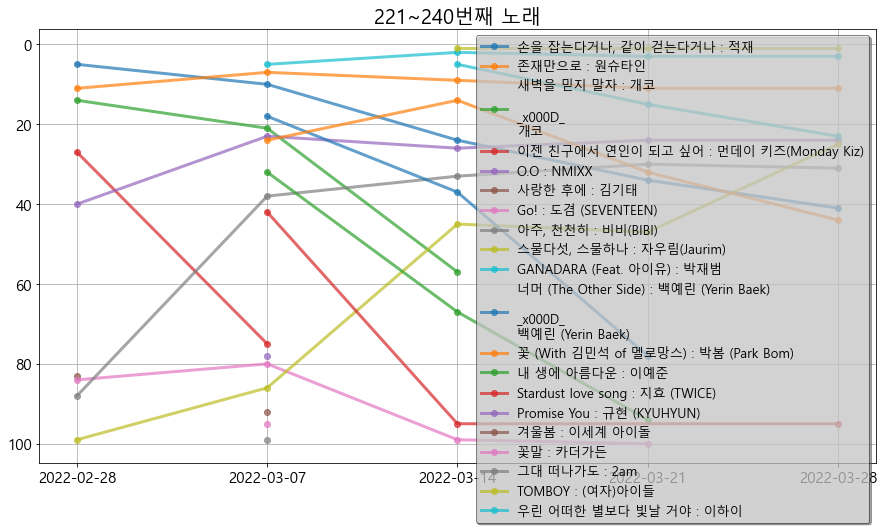

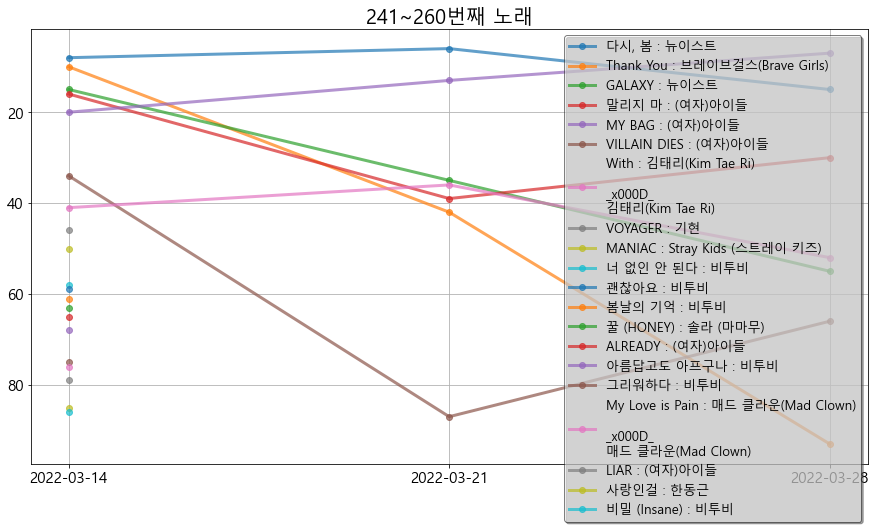

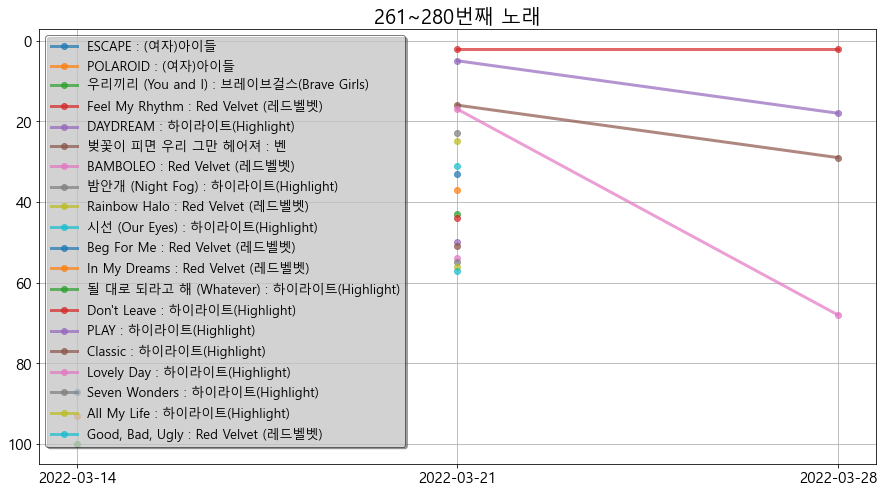

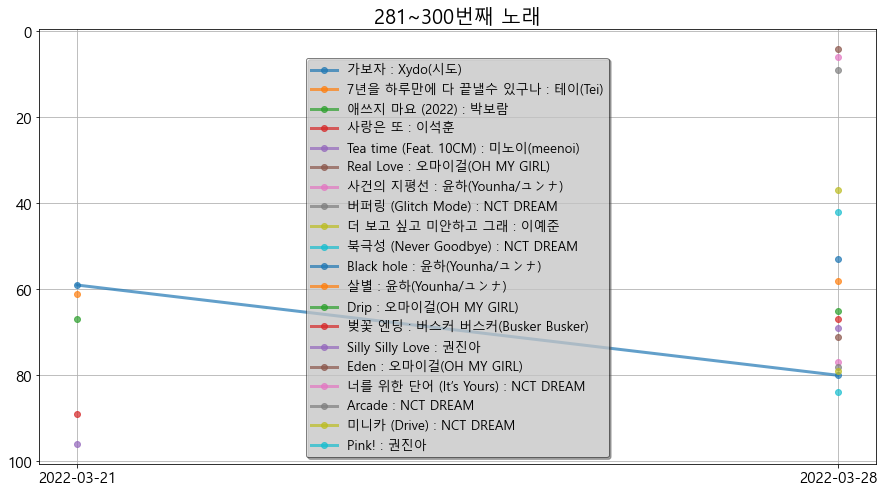

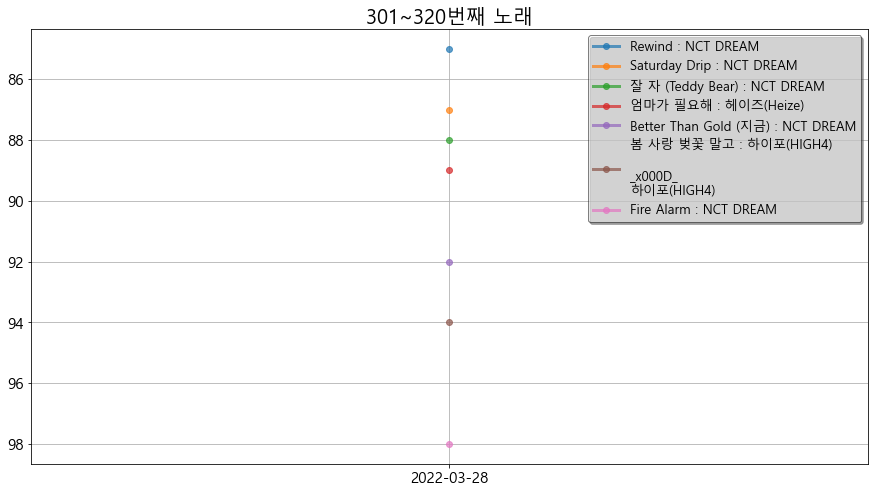

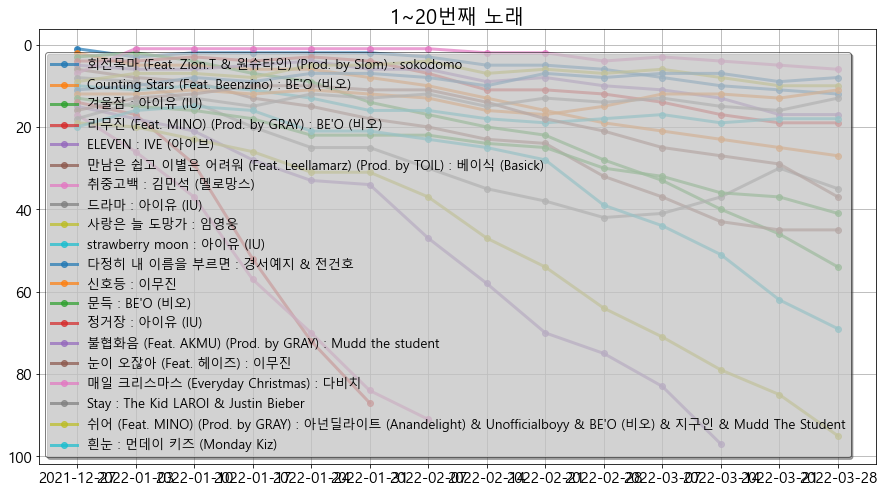

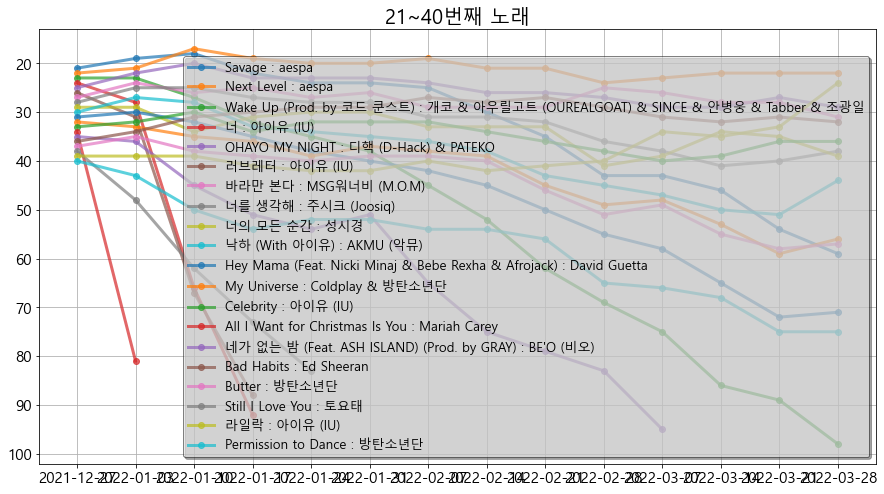

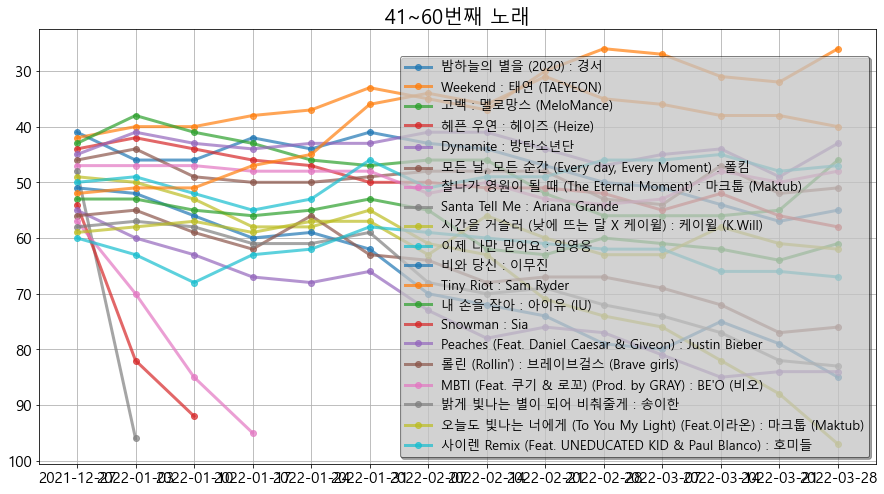

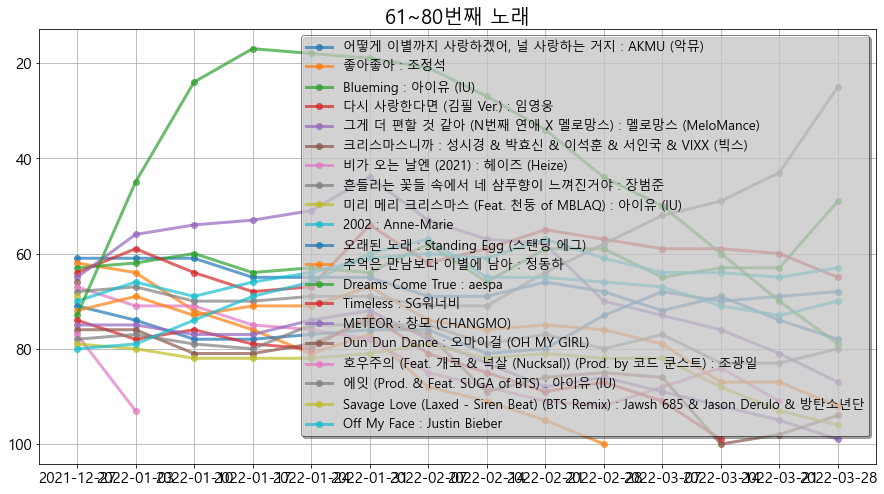

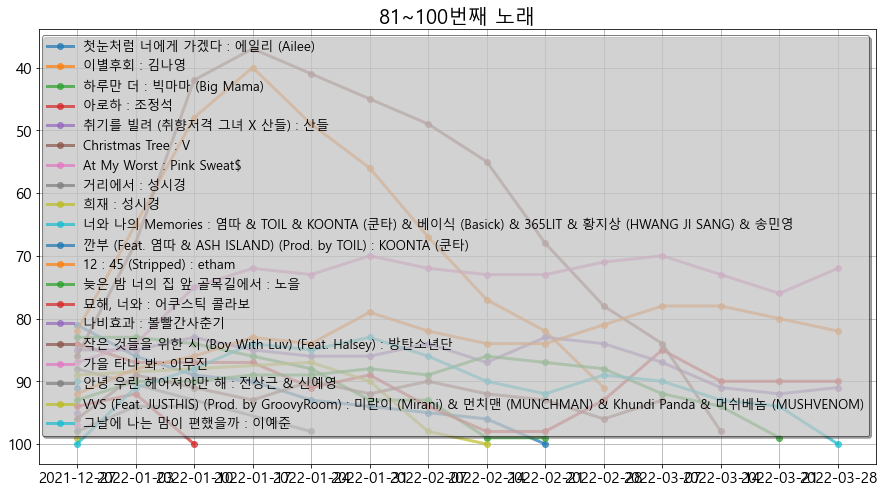

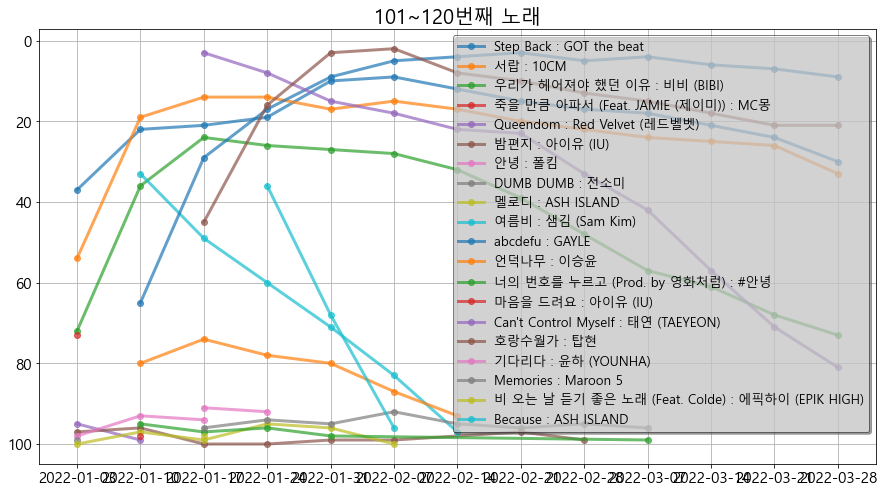

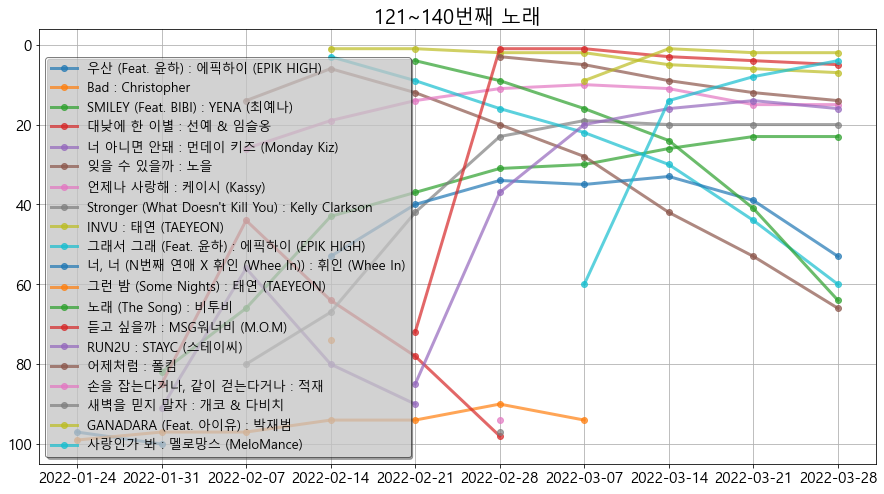

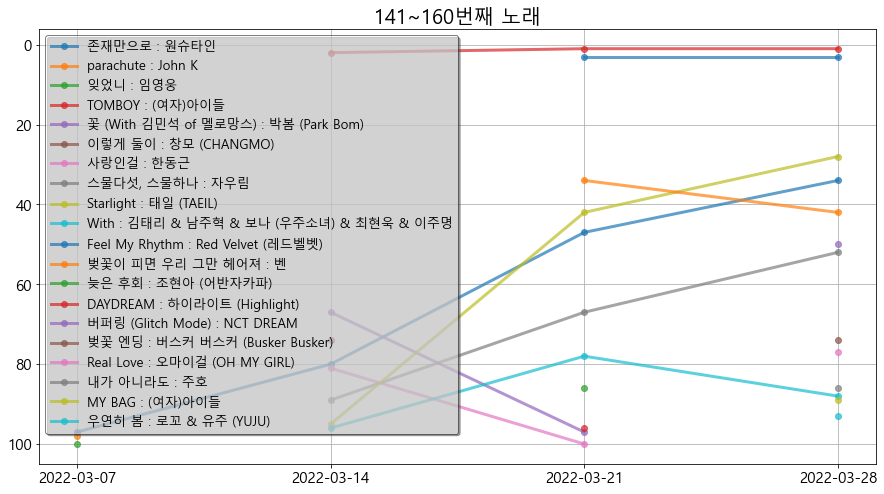

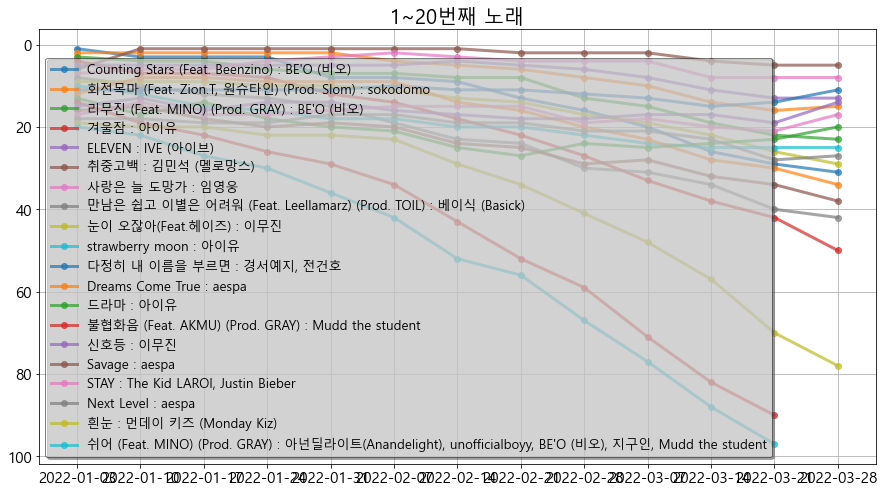

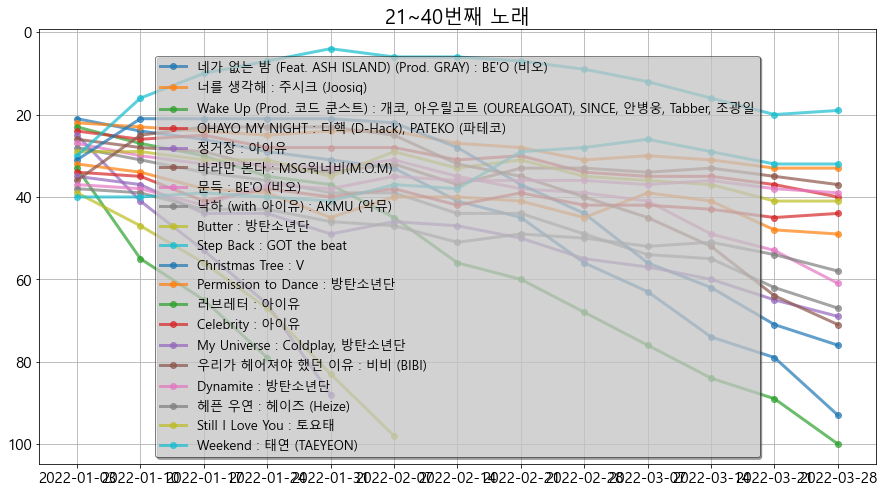

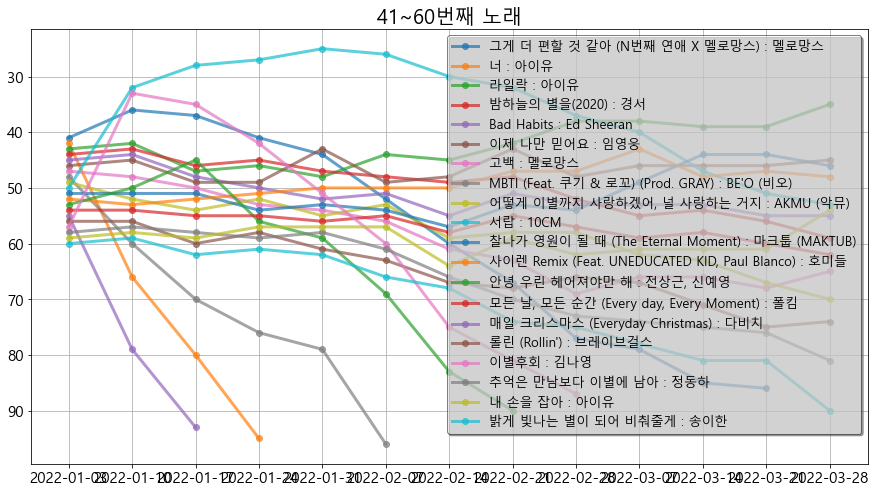

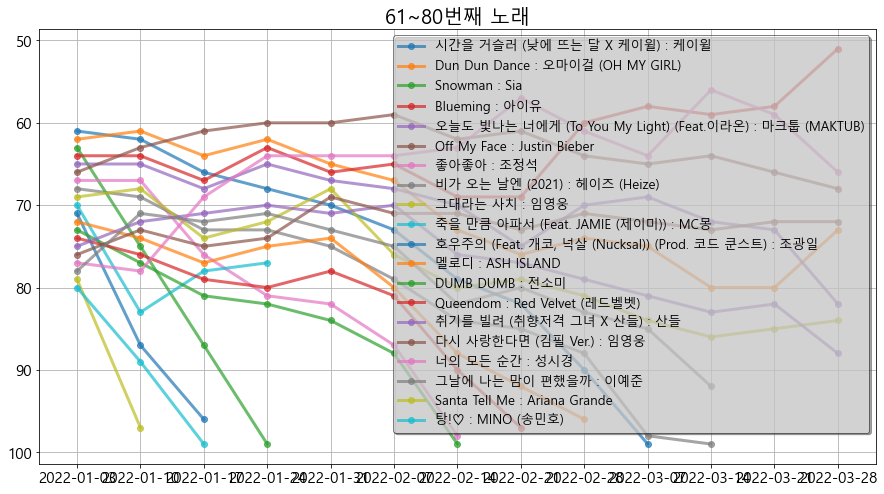

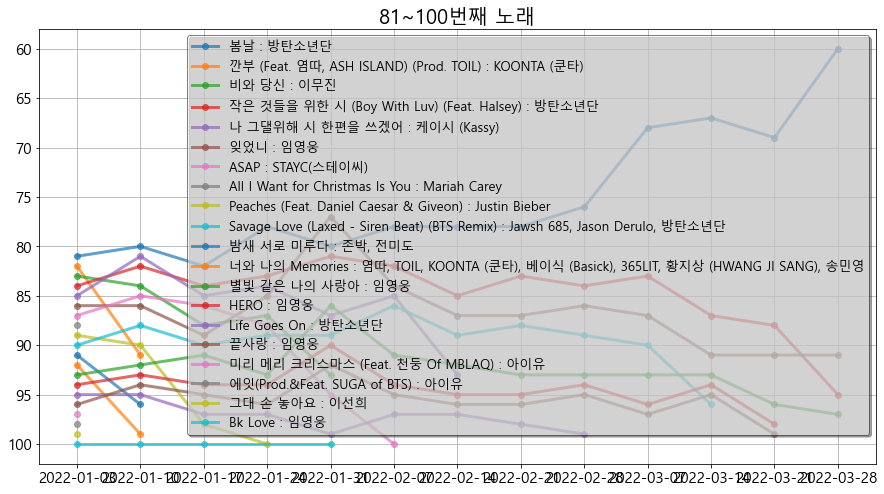

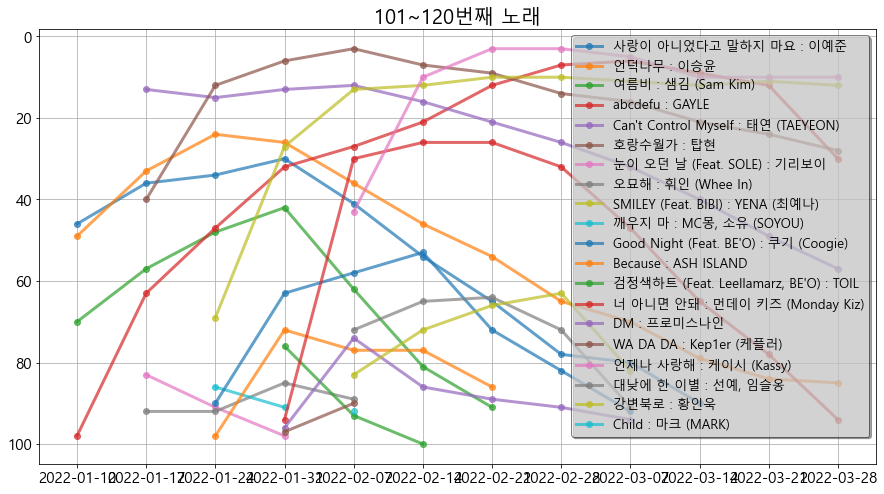

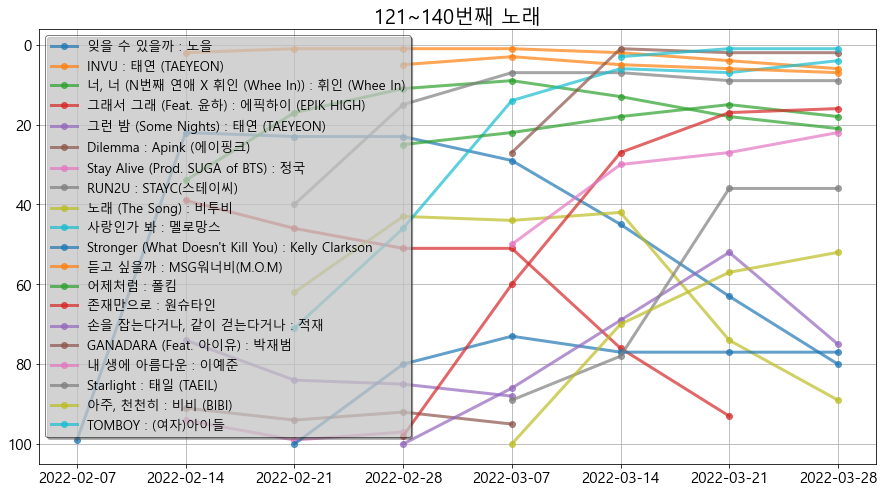

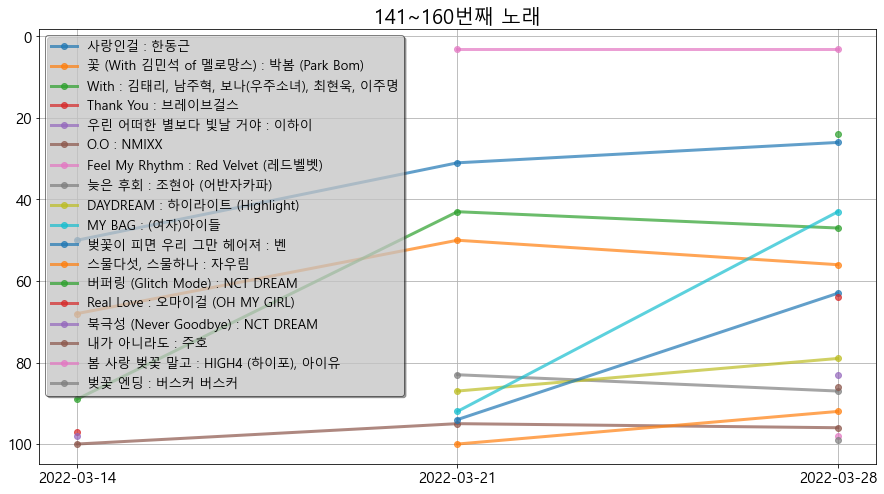

In [38]:
# 음원 사이트
site_list = ['week_bugs', 'week_genie', 'week_melon']
total_outlier_df = pd.DataFrame()
for site_name in site_list:
    # 실시간 순위 파일 폴더로 이동
    one_folder_path = os.path.join(path, site_name)
    os.makedirs(one_folder_path, exist_ok=True)
    file_list = os.listdir( one_folder_path )

    df = pd.DataFrame()
    for one in file_list:
        temp = pd.read_excel( os.path.join(one_folder_path, one) )
        df = pd.concat([df, temp], ignore_index=True)
    df['날짜'] = df['날짜'].astype(str)

    # 음원의 유일한 곡, 가수 명 남기기
    unique_sliced_df = df.drop_duplicates(['곡', '가수']).reset_index(drop=True)
    # 음원별 순위변동 추가 df
    song_df_list = []
    for i in range(unique_sliced_df.shape[0]):
        temp = unique_sliced_df.iloc[i:i+1, :].reset_index(drop=True)
        one_df = df[(df['곡'] == temp['곡'][0]) & (df['가수'] == temp['가수'][0])].reset_index(drop=True)
        one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
        one_df['순위변동'] = one_df['순위변동'].fillna(0)
        one_df['순위변동'] = one_df['순위변동'].astype('int64')
        song_df_list.append(one_df)
    # 그래프 저장할 폴더
    save_folder = f'/crawled_data/1_3month/{site_name}/'
    save_path = os.path.join(code_path, save_folder)
    os.makedirs(save_path, exist_ok=True)
    # 그래프 출력
    number = 20
    t = 0
    for i in range( math.ceil(len(song_df_list)/number) ):
        plt.figure( figsize=(15, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = song_df_list[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.savefig(save_path+ '/' + f'[{site_name}]1_3month_그래프{t:0>2}.png')

    # 이번주 모든 노래 데이터 병합
    total_df = pd.DataFrame()
    for one in song_df_list:
        total_df = pd.concat([total_df, one], ignore_index=True)
    # 음원의 유일한 곡, 가수만 남기기
    unique_music_df = total_df.sort_values(['곡', '가수', '순위']).reset_index(drop=True).drop_duplicates(['곡', '가수'], ignore_index=True)
    # 해당 음원의 순위변동이 양수인 df 추출
    mean_unique_music_df = pd.DataFrame()
    for i in range(unique_music_df.shape[0]):
        title = unique_music_df['곡'][i]
        artist = unique_music_df['가수'][i]
        temp = total_df[ (total_df['곡'] == title) & (total_df['가수'] == artist) & (total_df['순위변동'] > 0)].reset_index(drop=True)
        # 해당 음원의 순위변동평균
        temp['순위변동평균(양수)'] = round( temp['순위변동'].mean(), 1 )
        # 해당 음원 df의 첫째 줄만 추출
        first_temp = temp.iloc[0:1, :]
        mean_unique_music_df = pd.concat([mean_unique_music_df, first_temp], ignore_index=True)
    # 급등 음원 추출
    u_outlier = 30
    outlier_df = mean_unique_music_df[mean_unique_music_df['순위변동평균(양수)'] > u_outlier].reset_index(drop=True)
    # 파일 저장할 폴더 생성
    # 이상치 음원 평균 df 출력
    outlier_df.to_excel(save_path + '/' + f'[{site_name}]1_3month_mean_outliers.xlsx', index=False)
    print(f'[{site_name}]1_3month_mean_outliers.xlsx 출력')
    # 이상치 음원 df 종합
    total_outlier_df = pd.concat([total_outlier_df, outlier_df], ignore_index=True)

In [39]:
save_path

'c:/crawled_data/1_3month/week_melon/'